# Image Compression Using K-Means Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    
    for example_indice in range(len(X)):
        smallest_dist = 100000
        for centroid_indice in range(K):
            dist = X[example_indice] - centroids[centroid_indice]
            dist = sum(np.square(dist))
            if  dist < smallest_dist:
                idx[example_indice] = centroid_indice
                smallest_dist = dist

    return idx

In [4]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    c_k = np.zeros(K)
    
    for i in range(m):
        centroids[idx[i]] += X[i]
        c_k[idx[i]] += 1
        
    for j in range(K):
        centroids[j] /= c_k[j]
        
    return centroids

In [5]:
def k_means_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    
    return centroids

In [6]:
def run_k_means(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(1,1+max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
        if np.array_equal(previous_centroids, centroids):
            print("Converged.")
            break
        previous_centroids = centroids

    plt.show() 
    return centroids, idx

In [7]:
image_path = './images/plane_wikipedia_640px.png'

original_img = plt.imread(image_path)

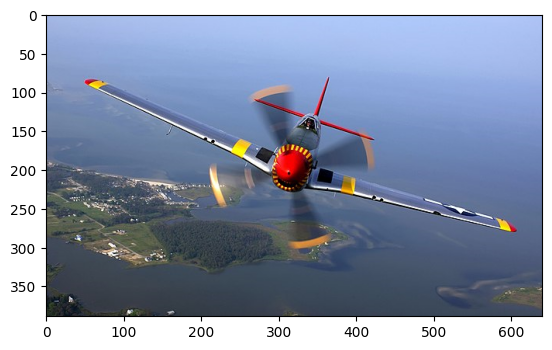

In [8]:
plt.imshow(original_img)

In [9]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (389, 640, 4)


jpg images' pixel values are between 0-255 contrary to png images' 0-1 range<br>
Also note that png images may have 4th A channel that holds the opacity value for a given pixel

In [10]:
if 0:
    jpg_img = plt.imread('./images/plane_wikipedia_640px.jpg')
    png_img = plt.imread('./images/plane_wikipedia_640px.png')
    
    # Example jpg pixel
    print(jpg_img[0])
    
    # Example png pixel
    print(png_img[0])


In [11]:
if image_path[-3:] != "png":
    original_img = original_img / 255

# Getting the first three channels to exclude the Alpha channel if the file type is png
rgb_img = original_img[:, :, :3]

# Reshaping the data to make each pixel a separate element
X_img = np.reshape(rgb_img, (rgb_img.shape[0] * rgb_img.shape[1], 3))

In [20]:
K = 8
max_iters = 100

initial_centroids = k_means_init_centroids(X_img, K)

centroids, idx = run_k_means(X_img, initial_centroids, max_iters)

K-Means iteration 1/100
K-Means iteration 2/100
K-Means iteration 3/100
K-Means iteration 4/100
K-Means iteration 5/100
K-Means iteration 6/100
K-Means iteration 7/100
K-Means iteration 8/100
K-Means iteration 9/100
K-Means iteration 10/100
K-Means iteration 11/100
K-Means iteration 12/100
K-Means iteration 13/100
K-Means iteration 14/100
K-Means iteration 15/100
K-Means iteration 16/100
K-Means iteration 17/100
K-Means iteration 18/100
K-Means iteration 19/100
K-Means iteration 20/100
K-Means iteration 21/100
K-Means iteration 22/100
K-Means iteration 23/100
K-Means iteration 24/100
K-Means iteration 25/100
K-Means iteration 26/100
K-Means iteration 27/100
K-Means iteration 28/100
K-Means iteration 29/100
K-Means iteration 30/100
K-Means iteration 31/100
K-Means iteration 32/100
K-Means iteration 33/100
K-Means iteration 34/100
K-Means iteration 35/100
K-Means iteration 36/100
K-Means iteration 37/100
K-Means iteration 38/100
K-Means iteration 39/100
K-Means iteration 40/100
K-Means i

<Figure size 800x600 with 0 Axes>

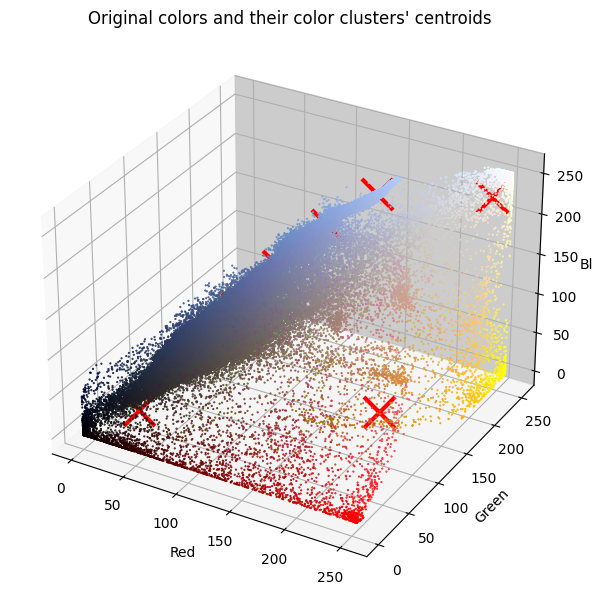

In [21]:
def plot_k_means_RGB(X, centroids, idx, K):
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()
    
plot_k_means_RGB(X_img, centroids, idx, K)


In [22]:
from IPython.display import Markdown, display
colors = 255*centroids

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">rgb({", ".join(map(str, color))}) <span style="color: rgb({", ".join(map(str, color))})">████████</span></span>'
    for color in colors
)))

<span style="font-family: monospace">rgb(37.73734400406333, 25.76247819850081, 29.0199288521171) <span style="color: rgb(37.73734400406333, 25.76247819850081, 29.0199288521171)">████████</span></span><br><span style="font-family: monospace">rgb(136.27507418082837, 160.25428080535013, 208.2463980068388) <span style="color: rgb(136.27507418082837, 160.25428080535013, 208.2463980068388)">████████</span></span><br><span style="font-family: monospace">rgb(108.98269930236398, 128.4620344439218, 166.98527934357068) <span style="color: rgb(108.98269930236398, 128.4620344439218, 166.98527934357068)">████████</span></span><br><span style="font-family: monospace">rgb(243.62799049970758, 241.1679397557528, 230.4315534029298) <span style="color: rgb(243.62799049970758, 241.1679397557528, 230.4315534029298)">████████</span></span><br><span style="font-family: monospace">rgb(86.9388350149867, 100.4057497292375, 125.04924314838163) <span style="color: rgb(86.9388350149867, 100.4057497292375, 125.04924314838163)">████████</span></span><br><span style="font-family: monospace">rgb(165.53679148351912, 189.53201538022802, 237.9221479743593) <span style="color: rgb(165.53679148351912, 189.53201538022802, 237.9221479743593)">████████</span></span><br><span style="font-family: monospace">rgb(62.77418406302624, 72.97396906656408, 84.92983818180946) <span style="color: rgb(62.77418406302624, 72.97396906656408, 84.92983818180946)">████████</span></span><br><span style="font-family: monospace">rgb(215.19528748793334, 106.55431895240812, 42.05320277749971) <span style="color: rgb(215.19528748793334, 106.55431895240812, 42.05320277749971)">████████</span></span>

In [23]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx, :] 

X_recovered = np.reshape(X_recovered, rgb_img.shape) 

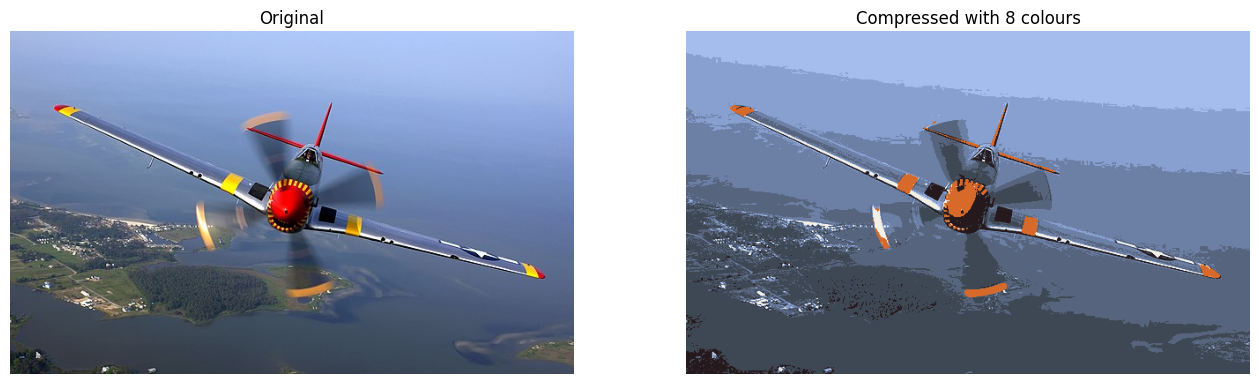

In [25]:
# Original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(rgb_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Compressed image
ax[1].imshow(X_recovered)
title = 'Compressed with ' + str(K) + ' colours'
ax[1].set_title(title)
ax[1].set_axis_off()